![](https://wallpaperboat.com/wp-content/uploads/2020/04/titanic-wallpaper-for-pc.jpg)

## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis

In [3]:
train = pd.read_csv('train.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


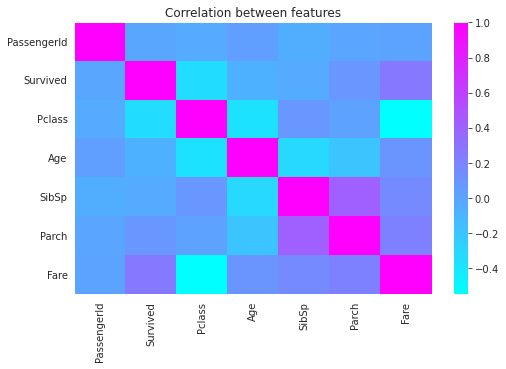

In [4]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(), cmap='cool')
plt.title('Correlation between features')
plt.show()

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

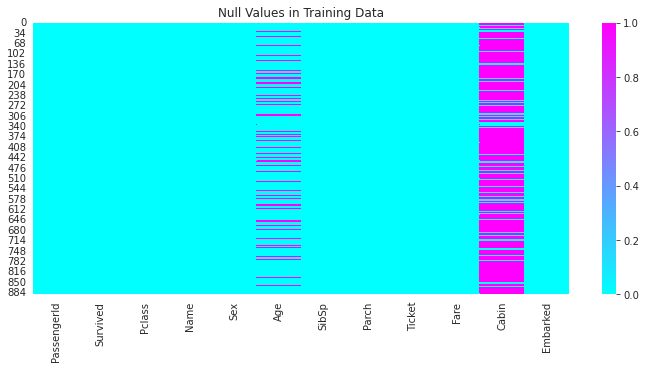

In [7]:
plt.figure(figsize=(12,5))
sns.heatmap(train.isnull(), cmap='cool')
plt.title('Null Values in Training Data')
plt.show()

## Data Visualization and Data Cleaning

### Working with 'Age' feature

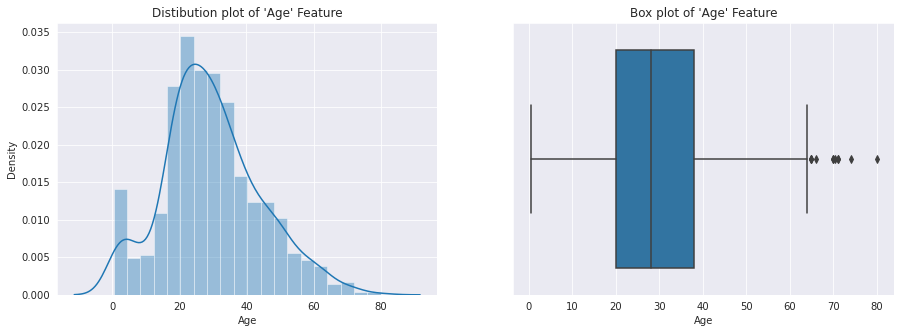

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train['Age'], ax=ax[0])
sns.boxplot(train['Age'], ax=ax[1])
ax[1].set_title("Box plot of 'Age' Feature")
ax[0].set_title("Distibution plot of 'Age' Feature")
fig.show()

In [9]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

### Working with 'Embarked' feature

In [10]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

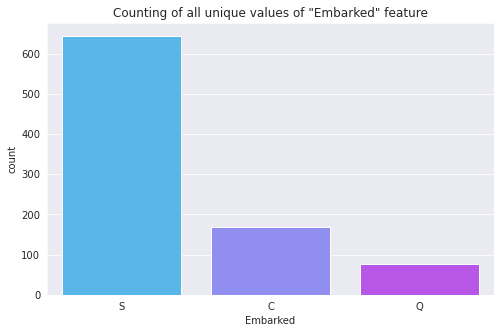

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(train['Embarked'], palette='cool', orient='v')
plt.title('Counting of all unique values of "Embarked" feature')
plt.show()

In [12]:
train['Embarked'].fillna('S', inplace=True)

### Woking with 'Cabin' features

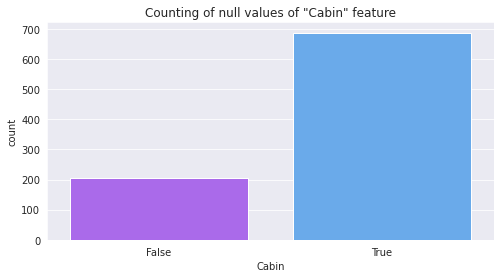

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(train['Cabin'].isnull(), palette='cool_r', orient='v')
plt.title('Counting of null values of "Cabin" feature')
plt.show()

#### As cabin column mostly contains NaN values. So, droping it.

In [14]:
train.drop('Cabin', axis=1, inplace=True)

#### Now, we're left with fresh data, containing no null values

In [15]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## Removing Outliers

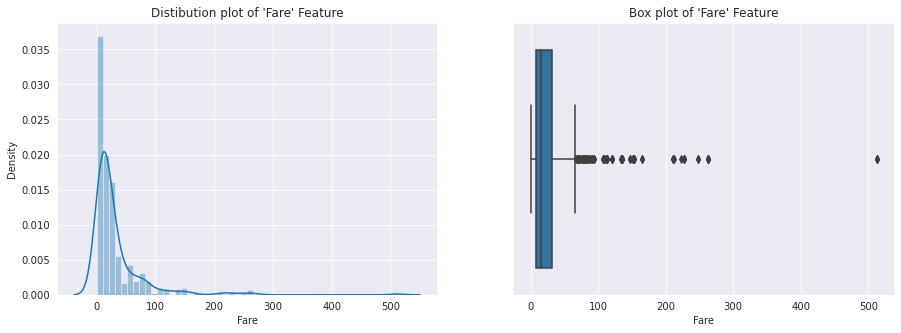

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train['Fare'], ax=ax[0])
sns.boxplot(train['Fare'], ax=ax[1])
ax[1].set_title("Box plot of 'Fare' Feature")
ax[0].set_title("Distibution plot of 'Fare' Feature")
fig.show()

In [17]:
med = train['Fare'].median()
Q = np.quantile(train['Fare'], 0.945)
train['Fare'] = train['Fare'].apply(lambda x:med if x > Q else x)
print('Outliers Removed...')

Outliers Removed...


## One Hot Encoding categorical data

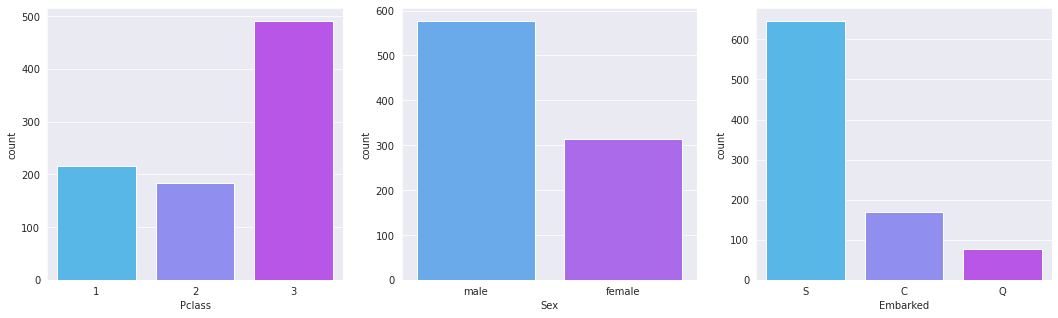

In [18]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
sns.countplot(train['Pclass'], palette='cool', ax=ax[0])
sns.countplot(train['Sex'], palette='cool', ax=ax[1])
sns.countplot(train['Embarked'], palette='cool', ax=ax[2])
plt.show()

In [19]:
pclass   = pd.get_dummies(train['Pclass'])
sex      = pd.get_dummies(train['Sex'])
embarked = pd.get_dummies(train['Embarked'])

pclass.columns   = ['Pclass_1', 'Pclass_2', 'Pclass_3']
sex.columns      = ['Female', 'Male']
embarked.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

In [20]:
data = pd.concat([train, pclass, sex, embarked], axis=1)
data.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)
data.drop(['Name', 'Ticket'], axis=1, inplace=True)
data.head(1)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.25,0,0,1,0,1,0,0,1


## Splitting dependent & independent variable

In [21]:
X = data.drop('Survived', axis=1)
y = data['Survived']

## Scaling the data

In [22]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [23]:
scaled = pd.DataFrame(X_scaled)
scaled.columns = X.columns
scaled.head(2)

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,-1.730108,-0.592481,0.432793,-0.473674,-0.717273,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.726220,0.638789,0.432793,-0.473674,2.322992,1.767767,-0.510152,-1.107926,1.355574,-1.355574,2.074505,-0.307562,-1.623803


## Splitting the dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.25)
print('Data Splitting Successful...')

Data Splitting Successful...


## Model Training

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Model Trained...')
print(f'Training Accuracy - {(model.score(X_train, y_train) * 100).round(2)}%')

Model Trained...
Training Accuracy - 79.49%


## Model Testing | Prediction

In [26]:
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(f'Testing Accuracy - {(score * 100).round(2)}%')

Testing Accuracy - 81.61%


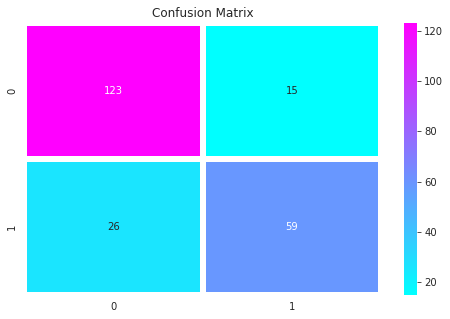

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='cool', annot=True,
            fmt='g', linewidths=5, linecolor='w')
plt.title('Confusion Matrix')
plt.show()